## **Importing the libraries needed**

In [138]:
#Importing all needed libraries
import pandas as pd
import numpy as np #Matric math
import tensorflow as tf
from tensorflow.python.framework import ops
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sys
import os
from scipy.io import loadmat
from scipy.io import loadmat

# sys.path.append(os.path.abspath("/Users/henda/anaconda3/Lib/site-packages"))
# from rnn_utils import *
# from public_tests import *
ops.reset_default_graph()

tf.compat.v1.reset_default_graph() #Clearning cache
sess=tf.compat.v1.InteractiveSession()




ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


## **Importing Training Dataset**

In [139]:
#Reading the training data Subject
training_data = loadmat(r"/content/sample_data/Sub2sub 10_Test.mat")

Data1=training_data["Data1"]
Data1=np.array(Data1)

# Time=Data1[1:(len(Data1))-3,0]
# X=Data1[3:len(Data1),[1, 8 ,9]]
# Z=Data1[1:(len(Data1))-3,[4 ,5 ,6 ,7]]
print(Data1.shape)

#####################################################



(6018, 10)


### **Defining the model**

In [140]:
# from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout


# Define your settings
numResponses = 4
numHiddenUnits = 400
timesteps = 25  # Number of timesteps (sequence length)
input_features = 4

model = Sequential([
    LSTM(numHiddenUnits, return_sequences=False, input_shape=(None, 24)),  # first LSTM layer
    Dense(50, activation='relu'),  # Dense layer
    Dropout(0.5),  # Dropout layer
    RepeatVector(timesteps),  # Repeat the dense output to make it suitable for LSTM input
    LSTM(numHiddenUnits, return_sequences=False),  # Second LSTM layer
    Dense(numResponses),  # Final Dense layer for output
])


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Dense, Dropout, Bidirectional, LSTM
# from tensorflow.keras import activations

# # Define optimized CNN-LSTM architecture
# model = Sequential()

# # 1st convolutional layer
# model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', use_bias=False, input_shape=(timesteps, input_features)))  # 15 timesteps, 24 features
# model.add(BatchNormalization())
# model.add(Activation(activations.relu))
# model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

# # 2nd convolutional layer
# model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False))
# model.add(BatchNormalization())
# model.add(Activation(activations.relu))
# model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

# # 3rd convolutional layer
# model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', use_bias=False))
# model.add(BatchNormalization())
# model.add(Activation(activations.relu))
# model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

# # # 4th convolutional layer
# # model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False))
# # model.add(BatchNormalization())
# # model.add(Activation(activations.relu))
# # model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))
# # model.add(Dropout(0.5))

# # Dense layer before LSTM
# model.add(Dense(400, activation='linear'))

# # Bidirectional LSTM layers
# model.add(Bidirectional(LSTM(1000, return_sequences=True)))
# model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(1000)))
# model.add(Dropout(0.2))
# # Final output layer for predicting 22 degrees of freedom (DOFs)
# model.add(Dense(numResponses, activation='linear'))  # Adjust the number of outputs for your case (22 DOFs)

# # Print model summary
# model.summary()

# #####################Model 2 for comparison#################
# # Build the model
# model = Sequential()

# # First RNN layer
# model.add(SimpleRNN(100, input_shape=(timesteps, input_features), return_sequences=False, activation='tanh'))
# model.add(Dropout(0.2))  # Regularization to prevent overfitting

# # Fully connected Dense layer
# model.add(Dense(50, activation='relu'))

# # Output Dense layer
# model.add(Dense(numResponses, activation='linear'))

# # Print model summary
# model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **The entire model training and cross validation**

In [141]:


from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn
import math
import random
pearson0=[]
pearson1=[]
pearson2=[]
pearson3=[]
mse0=[]
mse1=[]
mse2=[]
mse3=[]
for i in range(1,11):
  ran=random.randint(1, len(Data1)-2000)
  #D_train, D_test = train_test_split(Data1, test_size=0.30, random_state=1)
  D_train=np.concatenate((Data1[1:ran,:],Data1[ran+2000:len(Data1),:]))
  D_test=Data1[ran:ran+2000]

  Time=D_train[0:(len(D_train))-3,0]
  X=D_train[3:len(D_train),[1, 2,8 ,9]]
  Z=D_train[0:(len(D_train))-3,[4 ,5 ,6 ,7]]

  print(X.shape)
  print(Z.shape)
  input_train=Z
  output_train=X
  time_train=Time

  del Time
  del X
  del Z

  Time=D_test[0:(len(D_test))-3,0]
  X=D_test[3:len(D_test),[1, 2,8 ,9]]
  Z=D_test[0:(len(D_test))-3,[4 ,5 ,6 ,7]]


  input_test=Z
  output_test=X
  time_test=Time

  del Time
  del X
  del Z
  del D_train
  del D_test
  in_train=input_train
  in_test=input_test

################# For LSTM ONLY ##############
  # Assume data is your input array of shape (54151, 4)
  sequence_length = 25
  n_features = 4  # Number of features in your data

  # Initialize a new array to store the sequences (input_train)
  n_sequences = len(input_train) - sequence_length + 1
  in_train = np.zeros((n_sequences, sequence_length, n_features))

  # Fill the sequences array
  for i in range(n_sequences):
    in_train[i] = input_train[i:i+sequence_length]
  del n_sequences



    # Initialize a new array to store the sequences (input_test)
  n_sequences = len(input_test) - sequence_length + 1
  in_test = np.zeros((n_sequences, sequence_length, n_features))

  # Fill the sequences array
  for i in range(n_sequences):
    in_test[i] = input_test[i:i+sequence_length]

  del n_sequences

  print(in_train.shape)
  print(output_train.shape)
  print(in_test.shape)

#########Model Training ##########
  #Early stopping to the model to avoid overfitting
  from tensorflow.keras.callbacks import EarlyStopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)

  #Compile the model
  model.compile(optimizer='Adam',
            loss='mean_squared_error')
  #train the model
  history=model.fit(in_train,output_train,validation_split=0.2,
                 batch_size=16,
                 epochs=200,
                 verbose=1,
                callbacks=[early_stopping]

                 )

  # Print the model summary
  model.summary()

######Model Testing####
  #Model evaluation on testing dataset
  #score=model.evaluate(in_test, output_test)
  output_predicted=model.predict(in_test)

  print(output_predicted.shape)
  print(output_test.shape)

  ###Make sure length of predicted data is the same
  # del n_sequences
  n=len(output_test)-len(output_predicted)
  if n==0:
      out_test=output_test
  else:
      out_test=output_test[:-n,:]

  print(output_predicted.shape)
  print(out_test.shape)
  for i in range(len(output_predicted)):
    print("actual=%s, Predicted=%s"%(out_test[i],output_predicted[i]))

  # Getting cc
  pearson0.append(np.corrcoef(out_test[:,0],output_predicted[:,0])[1,0])
  print(pearson0)

  pearson1.append(np.corrcoef(out_test[:,1],output_predicted[:,1])[1,0])
  print(pearson1)

  pearson2.append(np.corrcoef(out_test[:,2],output_predicted[:,2])[1,0])
  print(pearson2)

  pearson3.append(np.corrcoef(out_test[:,3],output_predicted[:,3])[1,0])
  print(pearson3)


  mse0 .append( math.sqrt(sklearn.metrics.mean_squared_error(out_test[:,0],output_predicted[:,0])))
  print("RMSE (θ): %s" % mse0)

  mse1.append(math.sqrt(sklearn.metrics.mean_squared_error(out_test[:,1],output_predicted[:,1])))
  print("RMSE(x): %s" % mse1)

  mse2.append(math.sqrt(sklearn.metrics.mean_squared_error(out_test[:,2],output_predicted[:,2])))
  print("RMSE(Y): %s" % mse2)

  mse3.append(math.sqrt(sklearn.metrics.mean_squared_error(out_test[:,3],output_predicted[:,3])))
  print("RMSE(V): %s" % mse3)


Output hidden; open in https://colab.research.google.com to view.

### **Get the mean and std of CC and RMSE**

In [142]:
print("CC Mean (θ): %s" %np.mean(pearson0))
print("CC STD (θ): %s" %np.std(pearson0))
print("----------------------------------------")

print("CC Mean (X): %s" %np.mean(pearson1))
print("CC STD (X): %s" %np.std(pearson1))
print("----------------------------------------")

print("CC Mean (Y): %s" %np.mean(pearson2))
print("CC STD (Y): %s" %np.std(pearson2))
print("----------------------------------------")

print("CC Mean (V): %s" %np.mean(pearson3))
print("CC STD (V): %s" %np.std(pearson3))

print("----------------------------------------")
print("----------------------------------------")

print("RMSE Mean (θ): %s" %np.mean(mse0))
print("RMSE STD (θ): %s" %np.std(mse0))
print("----------------------------------------")

print("RMSE Mean (X): %s" %np.mean(mse1))
print("RMSE STD(X): %s" %np.std(mse1))
print("----------------------------------------")

print("RMSE Mean(Y): %s" %np.mean(mse2))
print("RMSE STD(Y): %s" %np.std(mse2))

print("----------------------------------------")


print("RMSE Mean(V): %s" %np.mean(mse3))
print("RMSE STD(V): %s" %np.std(mse3))
print("----------------------------------------")


CC Mean (θ): 0.020167993113418388
CC STD (θ): 0.047392690021203616
----------------------------------------
CC Mean (X): 0.007390634918255988
CC STD (X): 0.014508893124960405
----------------------------------------
CC Mean (Y): -0.005700356190567251
CC STD (Y): 0.046264899271533134
----------------------------------------
CC Mean (V): 0.045537308459018135
CC STD (V): 0.09275684926399458
----------------------------------------
----------------------------------------
RMSE Mean (θ): 0.20676119237071688
RMSE STD (θ): 0.011730015809246042
----------------------------------------
RMSE Mean (X): 0.18521739208013183
RMSE STD(X): 0.012331181412809802
----------------------------------------
RMSE Mean(Y): 0.1912283678250354
RMSE STD(Y): 0.020346069887285764
----------------------------------------
RMSE Mean(V): 0.27275995122528707
RMSE STD(V): 0.016805104490628067
----------------------------------------


### **Save the Results**

In [143]:
#Save the CC data in excel file

import openpyxl
# Load the existing workbook
from google.colab import drive
drive.mount('/content/drive')
workbook_path = '/content/drive/My Drive/Colab Notebooks/dataset/Fraunhofer LSTM-DL Subjectdependant.xlsx'
wb = openpyxl.load_workbook(workbook_path)

cc_means = [
    np.mean(pearson0),
    np.mean(pearson1),
    np.mean(pearson2),
    np.mean(pearson3)
]

mse_means = [
    (np.mean(mse0)),
    (np.mean(mse1)),
    (np.mean(mse2)),
    (np.mean(mse3))
]
# Select the active sheet
sheet = wb.active

row_name = 'S10-25'  # Change this to the appropriate row name for each run

# Find the row with the specified row name
target_row = None
for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row):
    if row[0].value == row_name:
        target_row = row[0].row
        break

# Check if the target row was found
if target_row:
    # Write the CC mean values to the found row, starting from the second column
    for col, value in enumerate(cc_means, start=2):  # Start at column 2 to skip the label
        sheet.cell(row=target_row, column=col, value=value)
    for col, value in enumerate(mse_means, start=2 + len(cc_means)+1):  # Start after CC columns
        sheet.cell(row=target_row, column=col, value=value)
else:
    print(f"Row '{row_name}' not found in the sheet.")

# Save the workbook
wb.save(workbook_path)
print("Data saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved successfully.


## **Showing results**

In [144]:
time_test=time_test[0:len(output_predicted)]
print(time_test.shape)

(1973,)


<function matplotlib.pyplot.show(close=None, block=None)>

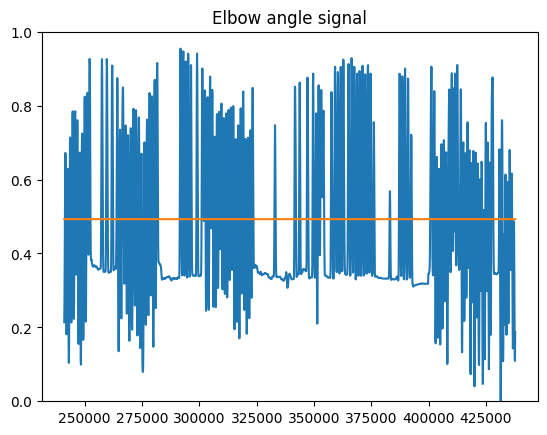

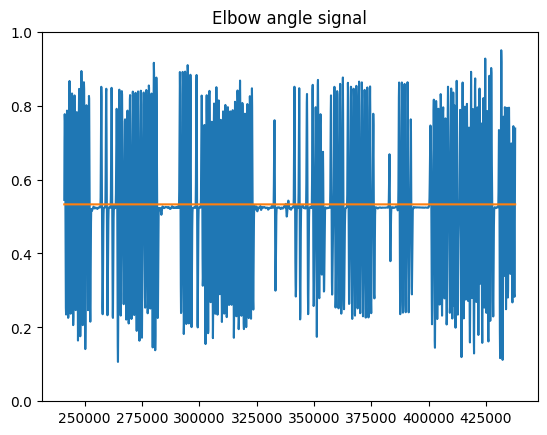

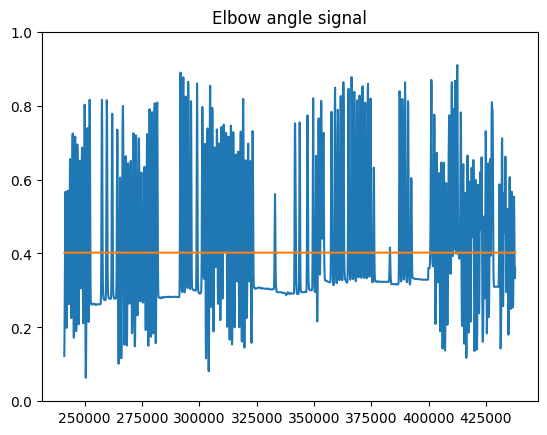

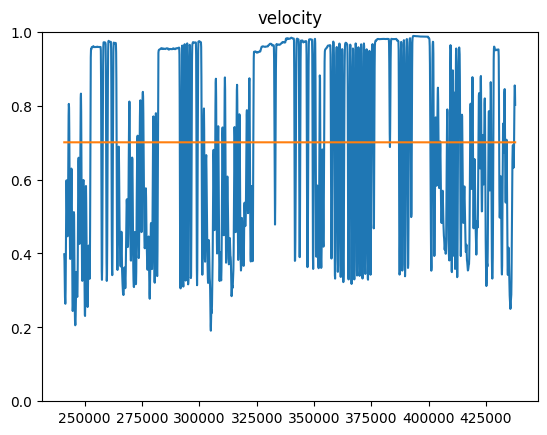

In [145]:
# Graphing the data
%matplotlib inline

fig1 = plt.figure("Figure 1")
#plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,0])
plt.plot(time_test,output_predicted[:,0])
plt.title('Elbow angle signal')

fig2 = plt.figure("Figure 2")
#plt.xlim(0, 5000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,1])
plt.plot(time_test,output_predicted[:,1])
plt.title('Elbow angle signal')

fig3 = plt.figure("Figure 3")
#plt.xlim(0, 5000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,2])
plt.plot(time_test,output_predicted[:,2])
plt.title('Elbow angle signal')
plt.show

fig4 = plt.figure("Figure 4")
#plt.xlim(0, 5000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,3])
plt.plot(time_test,output_predicted[:,3])
plt.title('velocity')
plt.show


### **Saving data to plot in Matlab**

In [146]:
# # Convert to DataFrame
# df = pd.DataFrame(time_test)
# # File path to save
# file_path = r"time.csv"
# # Write DataFrame to CSV
# df.to_csv(file_path, index=False)
# del df

# # Convert to DataFrame
# df = pd.DataFrame(out_test)
# # File path to save
# file_path = r"Ao.csv"
# # Write DataFrame to CSV
# df.to_csv(file_path, index=False)
# del df

# # Convert to DataFrame
# df = pd.DataFrame(output_predicted)
# # File path to save
# file_path = r"Po.csv"
# # Write DataFrame to CSV
# df.to_csv(file_path, index=False)